# Data 준비

수행하기 전에 Data를 준비합니다.

1. 우리가 제공한 데이터 세트를 다운로드하거나 동일한 형태의 데이터 세트(custom dataset)를 만들어 datasets-original 폴더 아래에 배치합니다.

-----------------------
```
 --mitochondrial_dataset
        ├-original
        ㅣ     ├-PLATE_II
        ㅣ     └-PLATE_III
        ㅣ         ....
        ├-split8x8
        ├-splitRGB
        └-convert
            ....
```
***********************
2. `config.py`의 `base_path`(base_path = "./dataset/mitochondrial_dataset/") 경로를 dataset 경로에 맞게 설정해줍니다.

3. `config.py`의 `plate_map`의 경우, 데이터 세트 기반으로 작성된 데이터 구분자입니다. custom dataset을 사용하는 경우, custom dataset에 맞게 설정해줍니다.

4. For details of the command line arguments, see '!OO_phase.py -h' or look at its source code to understand its behavior.

이제 기본적인 준비가 끝났습니다.
아래의 각 단계들을 차례차례(Step by Step) 수행하세요.

In [1]:
!python test.py

processed: 0
++++++++++

processed: 1
++++++++++

processed: 2
++++++++++

processed: 3
++++++++++

processed: 4
++++++++++

processed: 5
++++++++++

processed: 6
++++++++++

processed: 7
++++++++++

processed: 8
++++++++++

processed: 9
++++++++++

processed: 10
++++++++++

processed: 11
++++++++++

processed: 12
++++++++++

processed: 13
++++++++++

processed: 14
++++++++++

processed: 15
++++++++++

processed: 16
++++++++++

processed: 17
++++++++++

processed: 18
++++++++++

processed: 19
++++++++++

processed: 20
++++++++++

processed: 21
++++++++++

processed: 22
++++++++++

processed: 23
++++++++++

processed: 24
++++++++++

processed: 25
++++++++++

processed: 26
++++++++++

processed: 27
++++++++++

processed: 28
++++++++++

processed: 29
++++++++++

processed: 30
++++++++++

processed: 31
++++++++++

processed: 32
++++++++++

processed: 33
++++++++++

processed: 34
++++++++++

processed: 35
++++++++++

processed: 36
++++++++++

processed: 37
++++++++++

processed: 38
++++++++


  0%|          | 0/100 [00:00<?, ?it/s]
                                       

  0%|          | 0/100 [00:00<?, ?it/s]
                                       

 20%|##        | 20/100 [00:01<00:04, 19.96it/s]
                                                

 30%|###       | 30/100 [00:02<00:04, 14.05it/s]
                                                

 40%|####      | 40/100 [00:03<00:04, 12.17it/s]
                                                

 50%|#####     | 50/100 [00:04<00:04, 11.27it/s]
                                                

 60%|######    | 60/100 [00:05<00:03, 10.78it/s]
                                                

 70%|#######   | 70/100 [00:06<00:02, 10.49it/s]
                                                

 80%|########  | 80/100 [00:07<00:01, 10.30it/s]
                                                

 90%|######### | 90/100 [00:08<00:00, 10.19it/s]
                                                

100%|##########| 100/100 [00:09<00:00, 10.10i

In [12]:
from tqdm import tqdm
from time import sleep

with tqdm(total=100) as pbar:
    for i in range(10):
        pbar.update(10)

100%|██████████| 100/100 [00:00<?, ?it/s]


# Step 1. Pre-Processing

preprocess_phase.py는 original 세포 이미지를 slice, RGB(TMRM, Sytox, Hoechst) 분리, 이미지 노이즈 제거를 위해 전처리를 수행합니다. 그리고, 각 단계에 대한 결과를 저장합니다. 

> Note:이전 과정에 대한 결과가 저장되어 있어야합니다. 그래야, 다음 과정을 수행할 수 있습니다.
For example. original split 과정에 대한 결과가 저장되어 있어야하고, 다음 과정인 rgb split 과정을 수행할 수 있습니다.

Example run is:

```shell
python preprocess_phase.py -org_sl     ## Original Slice : Slice the original image into 8x8 images
                           -rgb_sp     ## RGB Split : Split the slice images into rgb(TMRM, Sytox, Hoechst) images
                           -rgb_pre    ## RGB Preprocessing : Pre-processing the sliced rgb images
                           
                           ## The options below are set as default values even if you do not enter them.
                           ## Please adjust the values if you want to modify the options.
                           # -cp_num 8
                           # -sy_thr 30
                           # -sy_rm_thr 220
                           # -ho_thr 5
```



In [9]:
!python preprocess_phase.py -org_sl -rgb_sp -rgb_pre

^C


# Step 2. Filtering

filtering_phase.py는 `Step 1.Pre-processing` 결과로부터 모델 학습에 불필요한 이미지들을 제거하기 위해 3단계의(Sytox&Hoechst Filtering -> TMRM Filtering-> Hoechst Clustering Filtering) 과정을 수행합니다. 그리고, 최종 필터링된 결과를 저장합니다. 

주의. 이전 과정에 대한 결과가 저장되어 있어야합니다. 그래야, 다음 과정을 수행할 수 있습니다.

For example. Step 1.Pre-processing 과정에 대한 결과가 저장되어 있어야 다음 과정인 Sytox& Hoechst 필터링 과정을 수행할 수 있습니다.

### Sytox & Hoechst Filtering
- 제공한 pre-trained detection 모델로부터 전처리된 sytox와 hoechst에 대한 cell detection & counting 수행
- 세포 사멸율 기반 이미지 필터링 수행

Example run is:

```shell
python filtering_phase.py -det_cnt     ## Cell Detection & Counting : Perform cell detection, counting, and cell death ratio calculation of Sytox and Hoechst
                           -sh_fil     ## Sytox & Hoechst Filtering : Perform filtering based on cell death ratio
                           
                           ## The options below are set as default values even if you do not enter them.
                           ## Please adjust the values if you want to modify the options.
                           # -sy_weight ~./sytox_pretrained.pt
                           # -ho_weight ~./hoechst_pretrained.pt
```

In [12]:
#### Cell detection & counting
!python filtering_phase.py -det_cnt

[filtering_phase]: cell_detection_counting=True, sytox_weight=C:\Users\User\PycharmProjects\MitoCelldeath_system\yolo_detect\sytox_trained_model.pt, hoechst_weight=C:\Users\User\PycharmProjects\MitoCelldeath_system\yolo_detect\hoechst_trained_model.pt, sytox_hoechst_filtering=False, tmrm_filtering=False, tmrm_bad_filter_threshold=20, hoechst_feature_extract_clustering=False, visualize=False, hoechst_filtering=False, hoechst_cluster_number=6, visualize_img_num=64, hoechst_silhouette_analysis=False

***********************************
  Start image filtering
***********************************
▶ Detect sytox and hoechst cells
YOLOv5  2023-3-14 Python-3.8.0 torch-1.11.0 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)

YOLOv5  2023-3-14 Python-3.8.0 torch-1.11.0 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)

Fusing layers... 
Fusing layers... 
Model summary: 367 layers, 46108278 parameters, 0 gradients
Model summary: 367 layers, 46108278 parameters, 0 gradients

100%|##########| 117162/117162 [59:

In [13]:
#### Sytox & Hoechst Filtering
!python filtering_phase.py -sh_fil

^C


### TMRM Filtering
- 전처리된 TMRM으로부터 네트워크 면적 비율을 계산
- threshold 기준으로 이미지 필터링 수행

Example run is:

```shell
python filtering_phase.py -tm_fil     ## TMRM Filtering : Perform network area ratio calculation of TMRM, and filter by ratio>threshold

                           ## The options below are set as default values even if you do not enter them.
                           ## Please adjust the values if you want to modify the options.
                           # -tm_thr 20
```

In [ ]:
#### TMRM Filtering
!python filtering_phase.py -tm_fil

### Hoechst Clustering Filtering
- 전처리된 Hoechst의 Feature를 추출
- 추출한 Feature를 사용하여 분류 알고리즘(K-Means clustering)을 수행
- 분류 결과 확인
- 필터링할 클러스터 번호를 선택(User input required)
- 선택된 클러스터 번호에 대해 이미지 필터링 수행

Example run is:

```shell
python filtering_phase.py -ho_feat_clu     ## Hoechst Feature Extracting & Clustering: Extract features of the Hoechst images and perform K-Means clustering
                          -vi              ## Visualize the Hoechst clustering results
                          -ho_fil          ## Hoechst Filteirng : Based on the clustering results, filtering is performed on user-standard input
                          
                           ## The options below are set as default values even if you do not enter them.
                           ## Please adjust the values if you want to modify the options.
                           # -ho_clu_num 6
                           # -vi_img_num 64
```

In [7]:
#### Hoechst Feature Extracting and Clustering(K-Means)
!python filtering_phase.py -ho_feat_clu

Traceback (most recent call last):
  File "filtering_phase.py", line 2, in <module>
    import pandas as pd
ModuleNotFoundError: No module named 'pandas'


In [14]:
#### Visualize the Hoechst clustering result images saved in the path ('~./clustering_result/hoechst/n_cluster/')
!python filtering_phase.py -vi

import os
from IPython.display import Image
from config import cluster_hoechst_path 
hoechst = Image(filename=os.path.join(cluster_hoechst_path, '6cluster', 'hoechst_cluster_visual.png'))
display(hoechst)

[filtering_phase]: cell_detection_counting=False, sytox_weight=C:\Users\User\PycharmProjects\MitoCelldeath_system\yolo_detect\sytox_trained_model.pt, hoechst_weight=C:\Users\User\PycharmProjects\MitoCelldeath_system\yolo_detect\hoechst_trained_model.pt, sytox_hoechst_filtering=False, tmrm_filtering=False, tmrm_bad_filter_threshold=20, hoechst_feature_extract_clustering=False, visualize=True, hoechst_filtering=False, hoechst_cluster_number=6, visualize_img_num=64, hoechst_silhouette_analysis=False

***********************************
  Start image filtering
***********************************
C:\Users\User\PycharmProjects\MitoCelldeath_system\core\clustering.py:252: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [15]:
#### '!python filtering_phase.py -ho_fil'을 실행할 경우, script 내의 user-standard input을 받아올 수 없어 아래의 코드로 실행합니다.
#### python shell에서는 정상적으로 사용가능합니다.

#### Hoechst filtering based on Hoechst clustering
# ** Check the Hoechst clustering result images saved in the path ('~./clustering_result/hoechst/n_cluster/')
# ** Or Check the Hoechst clustering result images visualized above
# ** Enter the cluster number to classify it as a bad image(the image you want to delete)
# ** For example, '1,2' or '1 2' --> In this case, it means cluster 1 and cluster 2

from core.filtering import Filtering
from core.io_utils import dump_json_object
from config import CELL_LOGGER 

n_clusters = 6

CELL_LOGGER.info('▶ Find bad images (*** Please Check the hoechst clustering result)')
rmClt_num = input(' -- Enter the cluster number to remove :')

# Run of hoechst filtering(remove bad images)
img_filter = Filtering(20, n_clusters, 64)
hoB_bad_img_dic, hoB_filtering_result = img_filter.hoechst_clustering_filtering(rmClt_num)
dump_json_object(hoB_bad_img_dic, 'hoB_bad_list.json')
dump_json_object(hoB_filtering_result, 'hoB_filter_result.json')

▶ Find bad images (*** Please Check the hoechst clustering result)
 -- Number of found bad images in cluster3, cluster5 : 22570
 Drop tmrm images 22570


  0%|          | 0/22570 [00:00<?, ?it/s]

 Drop sytox images 22570


  0%|          | 0/22570 [00:00<?, ?it/s]

 Drop hoechst images 22570


  0%|          | 0/22570 [00:00<?, ?it/s]

 -- Number of hoechst clustering filtered tmrm images    : 34090
 -- Number of hoechst clustering filtered sytox images   : 34090
 -- Number of hoechst clustering filtered hoechst images : 34090


In [16]:
#### hoechst clustering 결과에 대한 실루에 분석을 수행하고 싶을 경우, 아래의 주석을 삭제하고 실행하세요.
# !python filtering_phase.py -ho_sih

# Step 3. Clustering

clustering_phase.py는 `Step 2.Filtering` 결과에 대해 명확한(explicit) 세포 사멸 중증도를 분류하기 위해서 Sytox 기반 클러스터링을 수행하고, 모델 학습을 위한 TMRM 학습데이터셋을 생성합니다. Clustering 전체 과정에 대한 단계는 아래와 같습니다.

- 최종 필터링된 Sytox의 Feature를 추출
- 추출한 Feature를 사용하여 분류 알고리즘(K-Means clustering) & Silhouette 분석 수행
- TMRM과 Sytox의 분류 결과 확인
- 데이터셋(healthy, severe)으로 사용할 클러스터 번호를 선택(User input required)
- 선택된 클러스터 번호에 대한 데이터로 어노테이션 수행 및 최종 TMRM 학습데이터셋을 생성


주의. 이전 과정에 대한 결과가 저장되어 있어야합니다. 그래야, 다음 과정을 수행할 수 있습니다.
For example. Step 2.Filtering 과정에 대한 결과가 저장되어 있어야 다음 과정인 Sytox의 Feature 추출 과정을 수행할 수 있습니다.


Example run is:

```shell
python clustering_phase.py -feat_ext     ## Sytox Feature Extracting: Extract features of the final filtered Sytox images
                           -clu          ## Perform K-Means clustering and silhouette analysis.
                           -vi           ## Visualize the TMRM & Sytox clustering results
                           -an           ## Based on the clustering results, annotations are performed on user-standard input
                           
                           ## The options below are set as default values even if you do not enter them.
                           ## Please adjust the values if you want to modify the options.
                           # -clu_cls_num 4
                           # -vi_img_num 64
```


In [19]:
#### Sytox Feature Extracting
!python clustering_phase.py -feat_ext

[clustering_phase]: feature_extract=True, clustering=False, clustering_class_num=4, visualize=False, visualize_img_num=64, creat_annotation=False

***********************************
  Start image clustering
***********************************
▶ Feature extraction from images

100%|##########| 34090/34090 [02:14<00:00, 253.76it/s]


In [25]:
#### Perform K-Means clustering and silhouette analysis
# 본 논문에서는 4 progress(healthy, mild, medium, severe)로 분류&분석한 다음에 명확한 구분을 보이는 healthy, severe 데이터를 추출하여 데이터셋을 생성합니다.
!python clustering_phase.py -clu

[clustering_phase]: feature_extract=False, clustering=True, clustering_class_num=4, visualize=False, visualize_img_num=64, creat_annotation=False

***********************************
  Start image clustering
***********************************
▶ Perform clustering and silhouette analysis with 4 progress
 [Silhouette Clustering Result]
 -- For n_clusters : 4, The average silhouette_score is : 0.11777696758508682
 -- Number of cluster2 images : 7502
 -- Number of cluster0 images : 10494
 -- Number of cluster3 images : 7864
 -- Number of cluster1 images : 2962
[clustering_phase]: feature_extract=False, clustering=True, clustering_class_num=4, visualize=False, visualize_img_num=64, creat_annotation=False

***********************************
  Start image clustering
***********************************
▶ Perform clustering and silhouette analysis with 4 progress
 [Silhouette Clustering Result]
 -- For n_clusters : 4, The average silhouette_score is : 0.1175372451543808
 -- Number of cluster0

Figure(1500x1000)
Figure(1500x1000)


[clustering_phase]: feature_extract=False, clustering=False, clustering_class_num=4, visualize=True, visualize_img_num=64, creat_annotation=False

***********************************
  Start image clustering
***********************************
▶ Save visualization for clustering results 
 -- Save 64 tmrm images samples from cluster0
 -- Save 64 sytox images samples from cluster0
 -- Save 64 hoechst images samples from cluster0
 -- Save 64 tmrm images samples from cluster1
 -- Save 64 sytox images samples from cluster1
 -- Save 64 hoechst images samples from cluster1
 -- Save 64 tmrm images samples from cluster3
 -- Save 64 sytox images samples from cluster3
 -- Save 64 hoechst images samples from cluster3
 -- Save 64 tmrm images samples from cluster2
 -- Save 64 sytox images samples from cluster2
 -- Save 64 hoechst images samples from cluster2


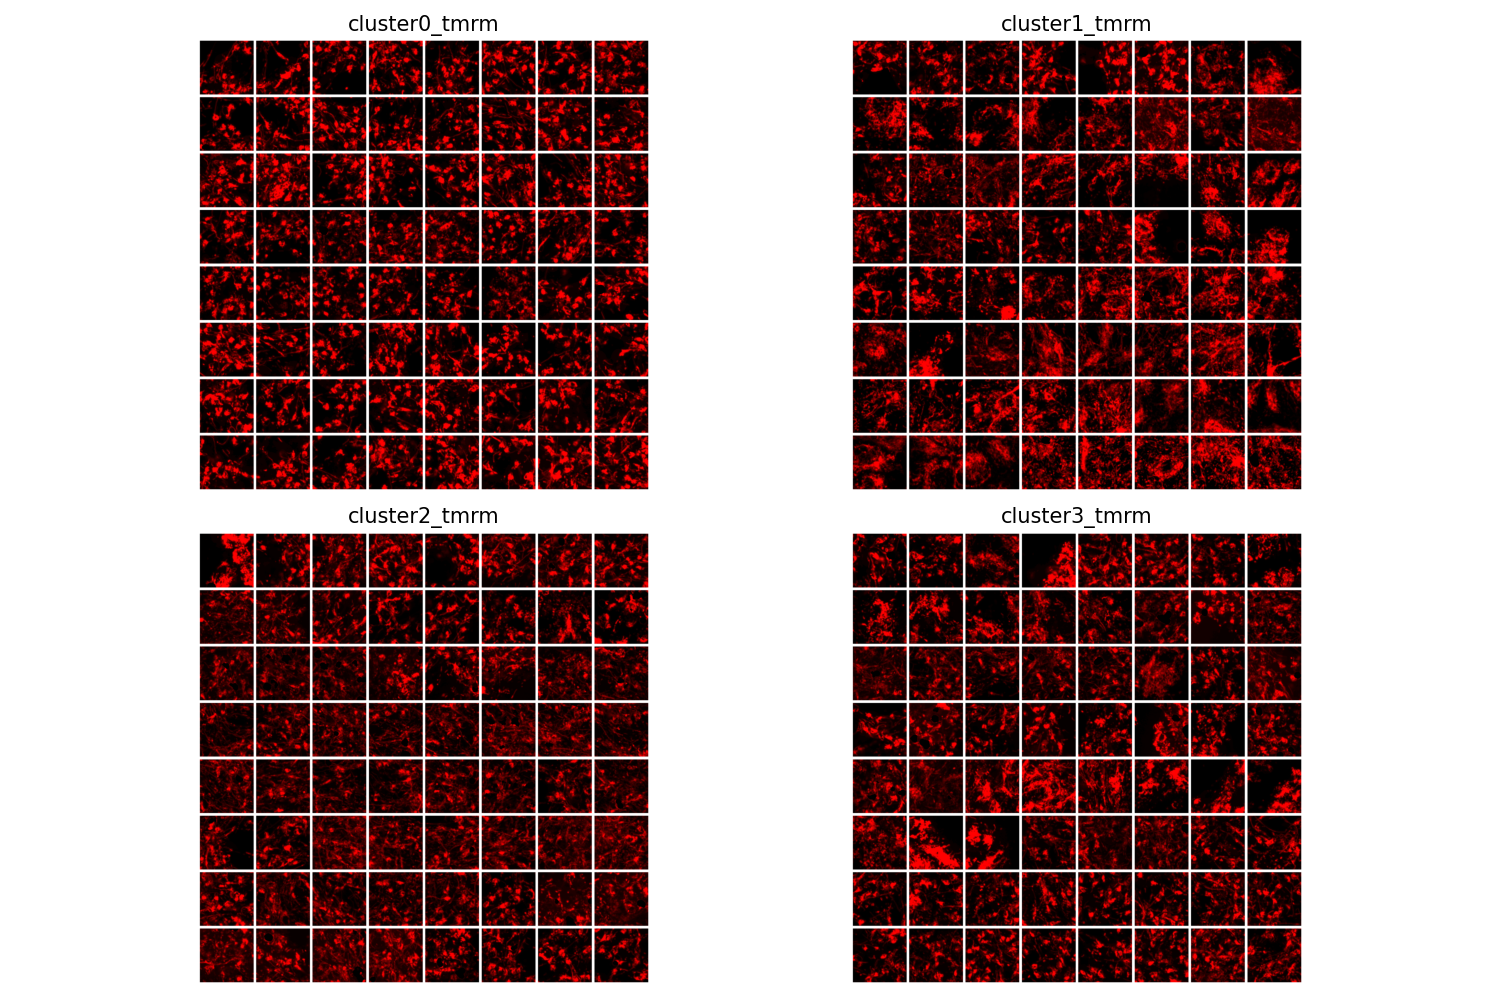

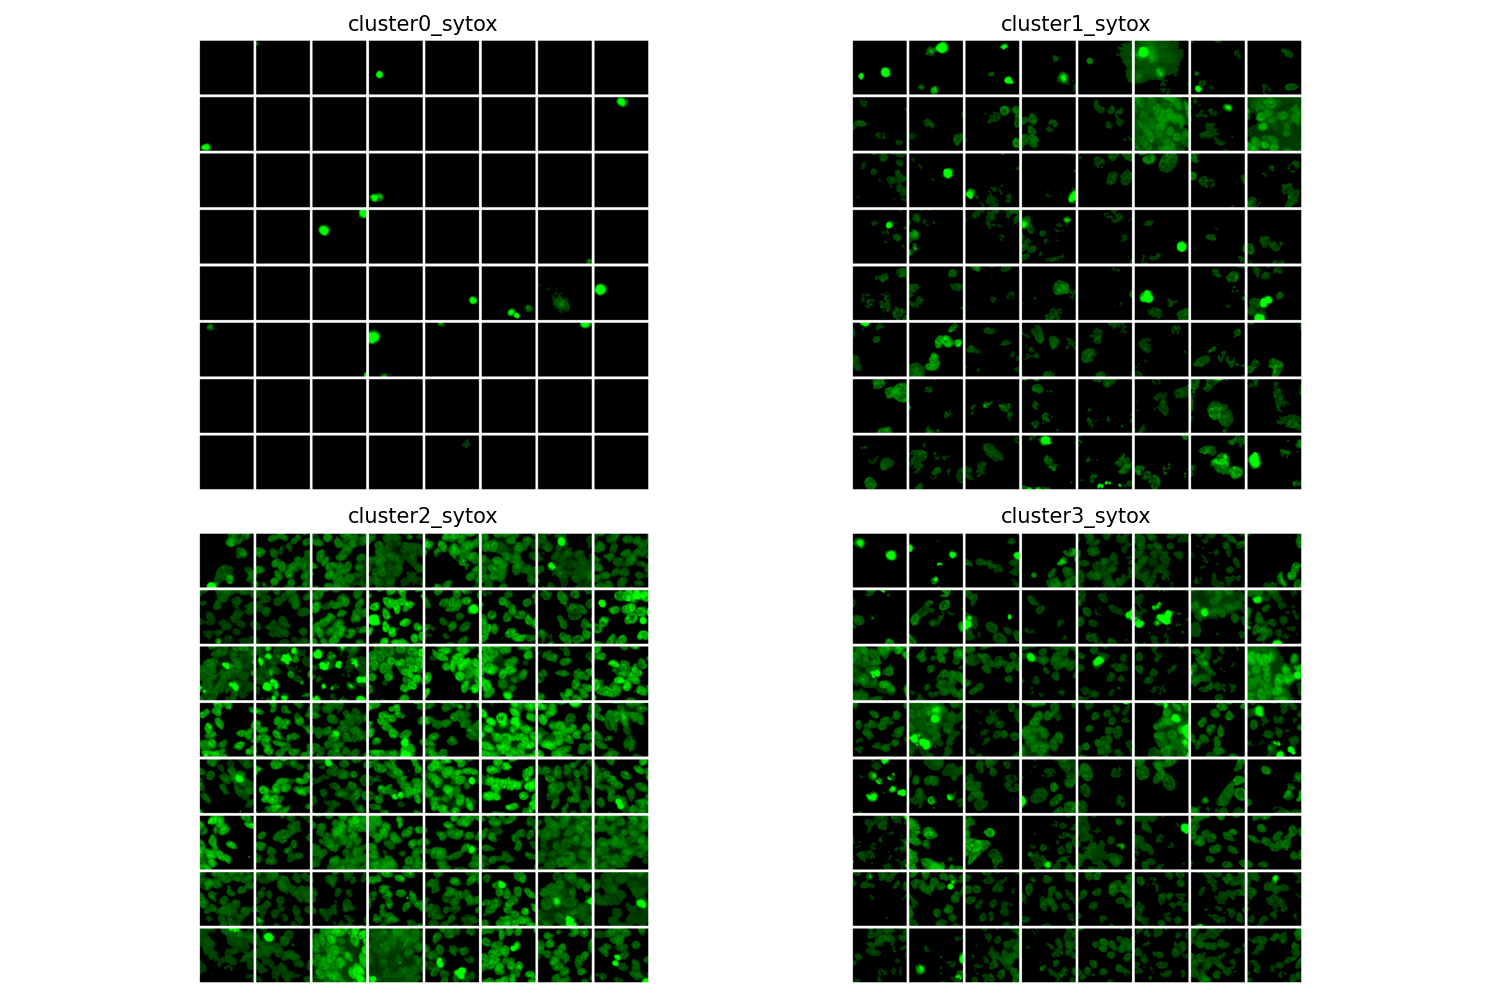

In [27]:
#### Visualize the TMRM & Sytox clustering result images saved in the path ('~./clustering_result/sytox/n_cluster/')
!python clustering_phase.py -vi

import os
from IPython.display import Image
from config import cluster_sytox_path 
tmrm = Image(filename=os.path.join(cluster_sytox_path,'4cluster','tmrm_cluster_visual.png'))
sytox = Image(filename=os.path.join(cluster_sytox_path,'4cluster','sytox_cluster_visual.png'))
display(tmrm)
display(sytox)

In [28]:
####'!python clustering_phase.py -an'을 실행할 경우, script 내의 user-standard input을 받아올 수 없어 아래의 코드로 실행합니다.
#### python shell에서는 정상적으로 사용가능합니다.

#### Perform annotation based on user-standard input
# ** Check the TMRM & Sytox clustering result images saved in the path ('~./clustering_result/sytox/n_cluster/')
# ** Or Check the MRM & Sytox clustering result images visualized above
# ** Enter the cluster number that shows a clear classification for healthy, and severe.

from annotation import Create_Annotation, Split_Annotation
from core.io_utils import load_json_object, dump_json_object

clustering_result = load_json_object('syB_clustering_result.json', compress=False)

healthy_clt = int(input(' -- Enter the cluster number corresponding to healthy : '))
severe_clt = int(input(' -- Enter the cluster number corresponding to severe : '))

clustering_map = {f'cluster{healthy_clt}': 'healthy', f'cluster{severe_clt}': 'severe'}
create_anno = Create_Annotation(clustering_result, clustering_map)

tmrm_annotation = create_anno.annotate('tmrm')
dump_json_object(tmrm_annotation, 'annotation_tmrm.json')

anno_split = Split_Annotation()
anno_split.trainValTest_split(tmrm_annotation, 'tmrm')

ValueError: invalid literal for int() with base 10: ''

# Step 4. Training and Testing

train_phase.py는 `Step 3.Clustering` 에서 생성한 TMRM 학습데이터셋을 이용하여 TMRM 기반 세포 사멸 progress(healthy, severe) 예측을 위한 모델 학습을 수행하고, Test 데이터로 모델을 평가합니다.

Example run is:

```shell
python train_phase.py -train                  ## Model training
                      -sa_fn exp_train_test   ## Folder name to save the trained model
                      -test                   ## Model Testing
                      -vi_test                ## Model test results visualization(Comparing tmrm and sytox)
                           
                      ## The options below are set as default values even if you do not enter them.
                      ## Please adjust the values if you want to modify the options.
                      # -ep 20
                      # -ba 128
                      # -lr 0.001
```


In [ ]:
#### Model Training
!python train_phase.py -train -ep 2 -ba 128 -sa_fn mito_result

%matplotlib inline
import os
import cv2
import matplotlib.pyplot as plt
from IPython.display import Image
from config import model_path

save_folder_name = 'mito_result'

acc = cv2.imread(os.path.join(model_path, f'save_model/{save_folder_name}', 'Accuracy.png'))
acc_img = cv2.cvtColor(acc, cv2.COLOR_BGR2RGB)

loss = cv2.imread(os.path.join(model_path, f'save_model/{save_folder_name}', 'Loss.png'))
loss_img = cv2.cvtColor(loss, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].imshow(acc_img)
axs[0].axis('off')
axs[1].imshow(loss_img)
axs[1].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
#### Model Testing
!python train_phase.py -test -sa_fn mito_result

In [ ]:
#### Model test results visualization(Comparing tmrm and sytox)
!python train_phase.py -vi_test -sa_fn mito_result

# visualize
import glob
from config import model_path

pred_result_list = os.listdir(os.path.join(model_path, f'save_model/{save_folder_name}/predict_result'))
pred_list = [pred for pred in pred_result_list if pred.startswith("predict_result")]

num_cols = 1
num_rows =int(n_clusters / num_cols) + (1 if n_clusters % num_cols != 0 else 0)
plt.figure(figsize=(15, 40))

for i, image in enumerate(pred_list):
    img = cv2.imread(os.path.join(model_path, f'save_model/{save_folder_name}/predict_result',image))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.show()

# Step 5. Evaluation


Evaluation을 수행하기 위해서는 Evaluation 데이터가 필요합니다. `Evaluation_Data`를 다운로드 받아 `plate_ix`, `plate_x`를 아래와 같이 배치합니다.

-----------------------
```
 --ㅡMitochondria_predict
        ├-core
        ├-efficientNet
        ㅣ  └-evaluation_data
        ㅣ      └-org_img
        ㅣ          ├-plate_ix
        ㅣ          └-plate_x
        ├-yolo_detect
        ├preprocess_phase.py
        └clustering_phase_.py
            ....
```
***********************

evaluation_phase.py는 건강한 사람과 PD 환자로부터 수집한 새로운 세포 데이터(`Evaluation_Data`)로 `Step 4.Training and Testing` 에서 학습한 모델을 평가합니다. 수집한 새로운 데이터는 5명의 건강한 사람, 4명의 PD 환자로부터 수집한 이미지 2,175개로 구성되어 있습니다.

Evaluation 수행 과정에 대한 단계는 아래와 같습니다.
- 새로운 세포 이미지를 RGB(TMRM, Sytox, Hoechst)로 분리 및 small set으로 slice
- TMRM, Sytox 이미지를 이용하여 TMRM 전처리 수행
- 네트워크 면적 비율 기준 TMRM 필터링
- Step4에서 학습한 모델로 이미지에 대한 예측 결과 수행

Example run is:

```shell
python evaluation_phase.py -rgb_sp                 ## RGB Split : Split the original image into rgb(TMRM, Sytox, Hoechst) images
                           -sl_fil                 ## TMRM Slice & Filtering : Slice the TMRM image into 8x8 and filter the image
                           -tmrm_pre               ## TMRM Preprocessing : Pre-processing the sliced tmrm images
                           -pred                   ## Model evaluation results visualization(Comparing tmrm and sytox)
                           -load_model ~./bestcheckpoint.pth.tar             ## Trained model load
                           
                           ## The options below are set as default values even if you do not enter them.
                           ## Please adjust the values if you want to modify the options.
                           # -cp_num 8
                           # -tm_th 20
                           # -sing_fname (ex) pix_002002-14_tmrm.png
                           # -img_dir ~./Mitochondria_final/efficientNet/evaluation_data/org_img
                           # -save_dir ~./Mitochondria_final/efficientNet/evaluation_data/result_img
                           # -hide_table
```


In [ ]:
#### Basic Step - Step1
#### RGB Split
#### TMRM, Sytox, Hoechst 가 Merge되어 있는 이미지를 input으로 사용할 경우 해당 과정을 먼저 수행해주세요.
!python evaluation_phase.py -rgb_sp

In [ ]:
#### Basic Step - Step2
#### TMRM Slice & Filtering
#### tmrm_pre(TMRM 전처리 수행)가 True인 경우, Base Case - Step1의 TMRM을 slicing -> 전처리 -> 필터링이 수행됩니다.
!python evaluation_phase.py -sl_fil -tmrm_pre

In [ ]:
#### Basic Step - Step3
#### Prediction
#### 모델 예측을 위해 예측하고자 하는 input derectory의 경로를 지정해주세요.
#### 조각들의 예측 결과를 show 하고 싶으면, hide_tabel을 remove 해주세요.
!python evaluation_phase.py -pred -hide_table -img_dir /home/svrmgr/project/Mitochondria_final/efficientNet/evaluation_data/result_img

In [ ]:
#### Other Case1. - Step1
#### TMRM Slice & Filtering
#### 폴더 경로를 지정하여 TMRM 이미지 여러개에 대해서 수행할 경우
!python evaluation_phase.py -sl_fil -img_dir /home/svrmgr/project/Mitochondria_final/efficientNet/evaluation_data/single_sample -save_dir /home/svrmgr/project/Mitochondria_final/efficientNet/evaluation_data/single_sample_result

In [ ]:
#### Other Case1. - Step2
#### Prediction
#### Other Case1.에 대해 prediction 수행
!python evaluation_phase.py -pred -img_dir /home/svrmgr/project/Mitochondria_final/efficientNet/evaluation_data/single_sample_result

In [ ]:
#### Other Case2. - Step1
#### TMRM Slice & Filtering
#### 단일 TMRM 이미지를 지정하여 수행할 경우
!python evaluation_phase.py -sl_fil -img_dir /home/svrmgr/project/Mitochondria_final/efficientNet/evaluation_data/single_sample -sing_fname pix_002002-14_tmrm.png -save_dir /home/svrmgr/project/Mitochondria_final/efficientNet/evaluation_data/single_sample_result2

In [ ]:
#### Other Case2. - Step2
#### Prediction
#### Other Case2.에 대해 prediction 수행
!python evaluation_phase.py -pred -img_dir /home/svrmgr/project/Mitochondria_final/efficientNet/evaluation_data/single_sample_result2